In [1]:
from aqua.diagnostics import sshVariabilityCompute, sshVariabilityPlot

/work/ab0995/a270260/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


In [2]:
dataset_dict = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990", "source":"ssh-IFS-NEMO-test", "regrid":"r025"}
dataset_dict_ref = {"catalog": "obs", "model": "AVISO", "exp":"ssh-L4", "source":"ssh-AVISO-test", "regrid":"r025"}

In [3]:
startdate="1994-01-01";enddate="1994-01-04"; startdate_ref="1994-01-01"; enddate_ref="1994-01-04";

In [4]:
ssh_dataset = sshVariabilityCompute(
                    **dataset_dict,
                    var='zos',
                    startdate=startdate,
                    enddate=enddate,)

In [5]:
ssh_dataset.run()

2025-10-06 17:24:34 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-10-06 17:24:34 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
/work/ab0995/a270260/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [6]:
ssh_dataset_ref = sshVariabilityCompute(
                    **dataset_dict_ref,
                    var='zos',
                    startdate=startdate,
                    enddate=enddate,)

In [7]:
ssh_dataset_ref.run()

2025-10-06 17:24:38 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-10-06 17:24:38 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
/work/ab0995/a270260/aqua/lib/python3.12/site-packages/dask/array/numpy_compat.py:57: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


In [8]:
ssh_dataset.data_std

<xarray.DataArray 'zos' (lat: 720, lon: 1440)> Size: 8MB
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.01932561, 0.0193877 , 0.019386  , ..., 0.01925822, 0.01925992,
        0.01926159],
       [0.01880131, 0.01884813, 0.01884646, ..., 0.01874955, 0.01875111,
        0.01875265],
       [0.01838576, 0.01842063, 0.01841987, ..., 0.01834864, 0.01834935,
        0.01835005]], shape=(720, 1440))
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes: (12/50)
    standard_name:                   sea_surface_height_above_geoid
    long_name:                       Sea surface height
    units:                           m
    dataset:                         climate-dt
    levtype:                         o2d
    generation:                      1
    ...                              ...
    catalog:                         climatedt-phase1
    exp:                             historical-1990
    var:                             zos
    region:                          global
    timestamp:                       2025-10-06 17:24:37
    aqua_version:                    0.18.0-alpha

In [9]:
ssh_dataset_ref.data_std

<xarray.DataArray 'zos' (lat: 720, lon: 1440)> Size: 8MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(720, 1440))
Coordinates:
  * lat      (lat) float64 6kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 12kB 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Attributes: (12/25)
    standard_name:       sea_surface_height_above_geoid
    long_name:           Sea surface height
    units:               m
    comment:             The absolute dynamic topography is the sea surface h...
    history:             \n2025-10-05 01:11:52 AQUA💧: Variable renamed zos fr...
    AQUA_model:          AVISO
    ...                  ...
    exp:                 ssh-L4
    realization:         r1
    var:                 zos
    region:              global
    timestamp:           2025-10-06 17:24:39
    aqua_version:        0.18.0-alpha

In [10]:
plot_class = sshVariabilityPlot()
sub_region_dataset = {"catalog": "climatedt-phase1", "model": "IFS-NEMO", "exp":"historical-1990", 'region': 'Agulhas', 'lon_limits': [5, 50], 'lat_limits': [-10, -50], 'proj': 'plate_carree', 'proj_params': {}}

2025-10-06 17:24:44 :: PlotSshvariability :: ERROR    -> Please specify the time period of the data


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'SSH Variability of Sea surface height for IFS-NEMO historical-1990 (None to None) Agulhas '}, xlabel='Longitude', ylabel='Latitude'>)

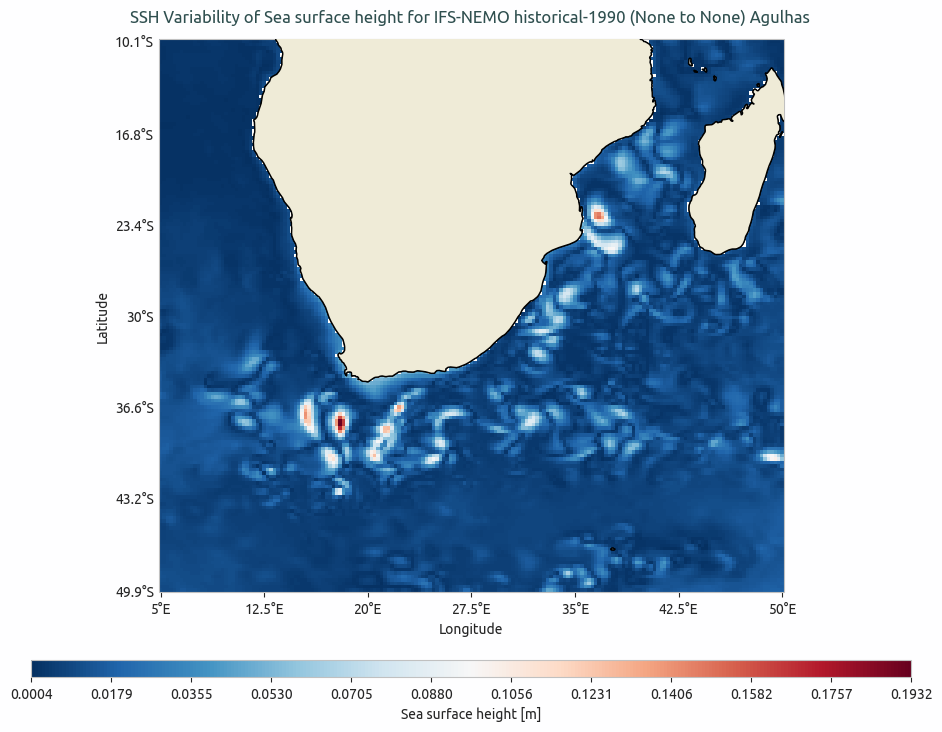

In [11]:
plot_class.plot(dataset_std=ssh_dataset.data_std, **sub_region_dataset)

2025-10-06 17:26:50 :: PlotSshvariability :: ERROR    -> Please specify the time period of the data


(<Figure size 1100x850 with 2 Axes>,
 <GeoAxes: title={'center': 'SSH Variability of Sea surface height for AVISO ssh-L4 (None to None) Agulhas '}, xlabel='Longitude', ylabel='Latitude'>)

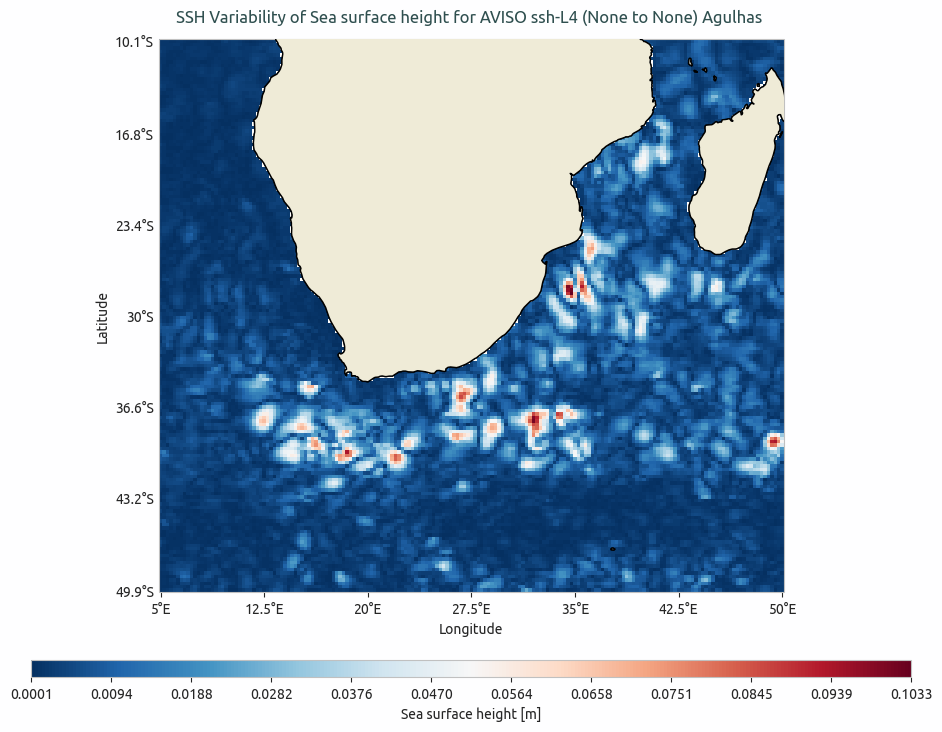

In [12]:
sub_region_dataset_ref = {"catalog": "obs", "model": "AVISO", "exp":"ssh-L4", 'region': 'Agulhas', 'lon_limits': [5, 50], 'lat_limits': [-10, -50], 'proj': 'plate_carree', 'proj_params': {}}
plot_class.plot(dataset_std=ssh_dataset_ref.data_std, **sub_region_dataset_ref)